#                                                                Titanic Dataset

## Importing the Important Libraries to perform on the DataSet


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Titanic-Dataset.csv")

## Underastanding the structure of the Dataframe 

In [5]:
# Structure(Rows, Column)
print(df.shape)

(891, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Visualising the Missing Value

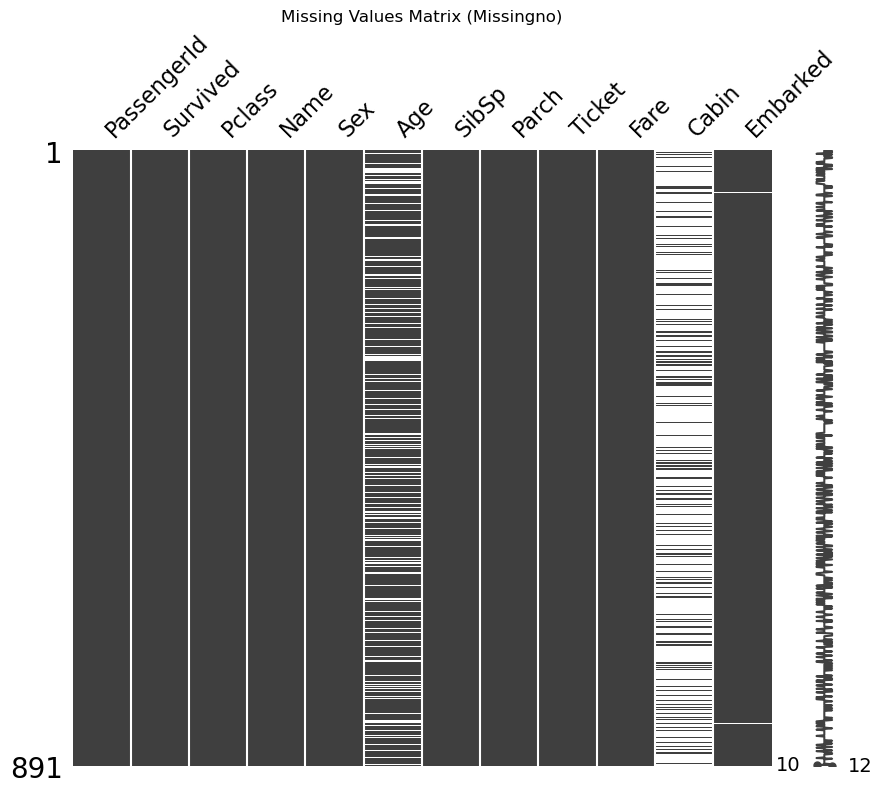

In [9]:
import missingno as msno
msno.matrix(df, figsize=(10, 8))
plt.title('Missing Values Matrix (Missingno)')
plt.show()

In [10]:
# Check missing values in numbers
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Handling the Missing Values

In [11]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median()) 
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))
# Cabin → extract Deck
df['Cabin'] = df['Cabin'].astype(str)
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != 'nan' else 'U')

# For categorical columns: mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64


## Encoding the Categorical Columns

In [12]:
#  Encode categorical columns

# Binary encoding for Sex
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# One-hot encoding for multi-category columns
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], drop_first=True)

# Drop text-heavy columns that cannot be used directly in modeling
df = df.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')

# Verify dataset
print("\nColumns after encoding:")
print(df.columns.tolist())

df.head()



Columns after encoding:
['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Deck,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,1,22.0,1,0,7.2500,U,False,True,False,True
1,2,1,0,38.0,1,0,71.2833,C,False,False,False,False
2,3,1,0,26.0,0,0,7.9250,U,False,True,False,True
3,4,1,0,35.0,1,0,53.1000,C,False,True,False,False
4,5,0,1,35.0,0,0,8.0500,U,False,True,False,True


In [13]:
deck_mapping = {'U': 1, 'C': 0} 
df['Deck'] = df['Deck'].map(deck_mapping)
# Identify all boolean columns
boolean_cols = df.select_dtypes(include=[bool]).columns.tolist()

# Convert them all to integer (1s and 0s)
for col in boolean_cols:
    df[col] = df[col].astype(int)

# Verify the final dataset
print("\nFinal Column Data Types:")
print(df.dtypes)
print("\nFirst 5 rows after final encoding:")
print(df.head())


Final Column Data Types:
PassengerId      int64
Survived         int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Deck           float64
Embarked_Q       int32
Embarked_S       int32
Pclass_2         int32
Pclass_3         int32
dtype: object

First 5 rows after final encoding:
   PassengerId  Survived  Sex   Age  SibSp  Parch     Fare  Deck  Embarked_Q  \
0            1         0    1  22.0      1      0   7.2500   1.0           0   
1            2         1    0  38.0      1      0  71.2833   0.0           0   
2            3         1    0  26.0      0      0   7.9250   1.0           0   
3            4         1    0  35.0      1      0  53.1000   0.0           0   
4            5         0    1  35.0      0      0   8.0500   1.0           0   

   Embarked_S  Pclass_2  Pclass_3  
0           1         0         1  
1           0         0         0  
2           1         0         1  
3           1         0

## Standardisation and Normalisation

In [14]:
#Standardize numerical features
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
num_cols = ['Age', 'Fare']

scaler = StandardScaler()

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verify transformation
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,2.272780e-16,1.000562,-2.224156,-0.565736,-0.104637,0.433312,3.891554
Fare,891.0,3.987333e-18,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167


### Visualising and treating the Outliers  

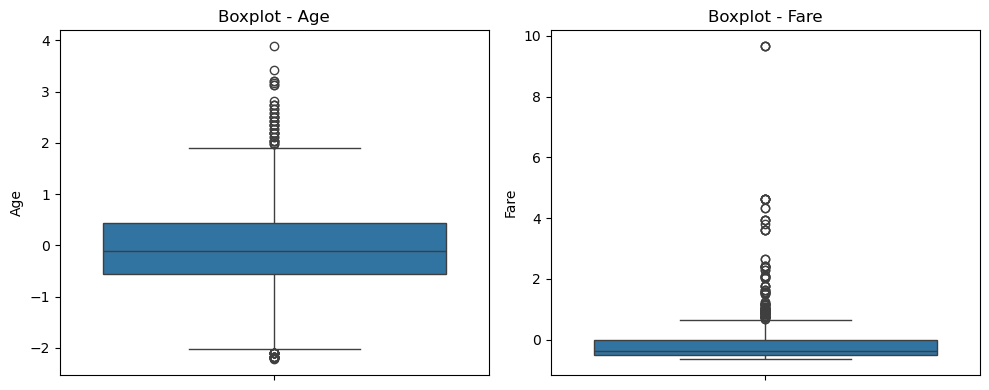

In [15]:
# Visualize outliers
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(y=df['Age'])
plt.title("Boxplot - Age")

plt.subplot(1,2,2)
sns.boxplot(y=df['Fare'])
plt.title("Boxplot - Fare")

plt.tight_layout()
plt.show()


In [16]:
# Remove outliers using IQR method
df_clean = df.copy()  # keep a copy of original

for col in ['Age', 'Fare']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    before = df_clean.shape[0]
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    after = df_clean.shape[0]

    print(f"{col}: Removed {before - after} outliers")

# Final dataset shape
print("\nFinal dataset shape after outlier removal:", df_clean.shape)


Age: Removed 66 outliers
Fare: Removed 107 outliers

Final dataset shape after outlier removal: (718, 12)


In [17]:
df_clean.shape

(718, 12)

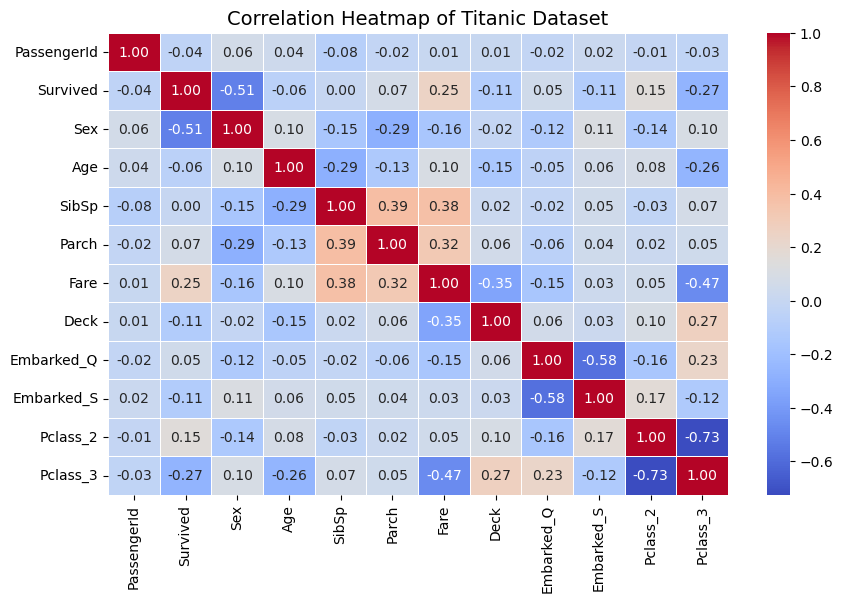

In [18]:
# Step 6 — Generate correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_clean.corr()

# Set up the figure
plt.figure(figsize=(10,6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Titanic Dataset", fontsize=14)
plt.show()